In [1]:
import sequence_processing as sp
import visualize_series as vs
import stumpy
import numpy as np

## Loading Protein Sequences from fasta

In [2]:
seqs = sp.get_sequences_from_fasta('protein-sample.txt')
seqs

[Seq('LYLIFGAWAGMVGTALSLLIRAELGQPGTLLGDDQIYNVIVTAHAFVMIFFMVM...LIL'),
 Seq('VGTALXLLIRAELXQPGALLGDDQIYNVVVTAHAFVMIFFMVMPIMIGGFGNWL...LIL'),
 Seq('LYLIFGAWAGMVGTALSLLIRAELGQPGALLGDDQVYNVVVTAHAFVMIFFMVM...LIL'),
 Seq('WAGMVGTALSLLIRAELGQPGALLGDDQIYNVVXTAHAFVMIFFMVMPIMIGGF...LIL'),
 Seq('LYLIFGAWAGMVGTALSLLIRAELGQPGALLGDDQVYNVVVTAHAFVMIFFMVM...LIX'),
 Seq('WAGMVGTALSLLIRAELGQPGALLGDDQIYNVVVTAHAFVMIFFMVMPIMIGGF...LIL'),
 Seq('VGTALSLLIRAELGQPGTLLGDDQIYNVIVTAHAFVMIFFMVMPVMIGGFGNWL...LIL')]

## Transform protein sequences into numerical sequences

In [3]:
nseqs = sp.proteins_to_series(seqs)
#nseqs = nseqs[0:3]


## Visualize proteins as time series

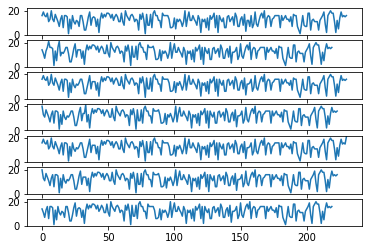

In [4]:
vs.visualize_sequences(nseqs)

## Find the consensus motif

In [5]:
m = 25
Ts = nseqs
radius, Ts_idx, subseq_idx = stumpy.ostinato(Ts, m)
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 0.0 in time series 0 starting at subsequence index location 199.


## Visualize motifs

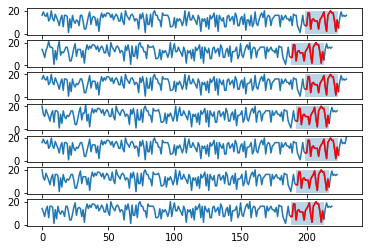

In [6]:
vs.visualize_consensus_motifs_in_sequence(nseqs, m, Ts_idx, subseq_idx)

## Visualize motifs

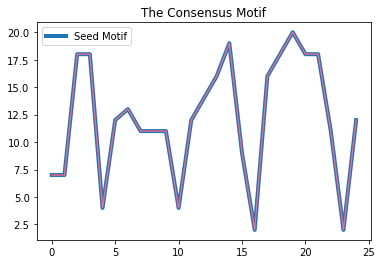

In [7]:
vs.visualize_consensus_motifs(nseqs, m, Ts_idx, subseq_idx)

In [8]:
print(vs.consensus_motif(nseqs, m, Ts_idx, subseq_idx))

{1: 'R', 2: 'H', 3: 'K', 4: 'D', 5: 'E', 6: 'S', 7: 'T', 8: 'N', 9: 'Q', 10: 'C', 11: 'G', 12: 'P', 13: 'A', 14: 'V', 15: 'I', 16: 'L', 17: 'M', 18: 'F', 19: 'Y', 20: 'W', 21: 'X'}
[['T', 'T', 'F', 'F', 'D', 'P', 'A', 'G', 'G', 'G', 'D', 'P', 'V', 'L', 'Y', 'Q', 'H', 'L', 'F', 'W', 'F', 'F', 'G', 'H', 'P']]


## Find multiple motifs

In [6]:
seqs = sp.get_sequences_from_fasta('test.fasta')
seqs = sp.proteins_to_series(seqs)
    
m = 10
n = 4 
motifs, pos_in_seq = sp.get_n_motifs(seqs, m , n)

In [7]:
print(motifs)

[array([ 3.,  3., 15., 16.,  7.,  7., 19.,  6., 14., 18.]), array([18., 18., 19.,  9., 13.,  4.,  4.,  8.,  2., 19.]), array([ 2.,  6., 15., 10., 11., 11.,  7., 11.,  6., 11.]), array([15.,  4.,  6.,  7.,  4.,  8., 18.,  5., 11., 18.])]


In [8]:
print(sp.series_to_proteins(motifs))

[['K', 'K', 'I', 'L', 'T', 'T', 'Y', 'S', 'V', 'F'], ['F', 'F', 'Y', 'Q', 'A', 'D', 'D', 'N', 'H', 'Y'], ['H', 'S', 'I', 'C', 'G', 'G', 'T', 'G', 'S', 'G'], ['I', 'D', 'S', 'T', 'D', 'N', 'F', 'E', 'G', 'F']]


In [9]:
pos_in_seq

[[162, 162, 162, 163, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [50, 50, 50, 362, 51, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 0, 0],
 [138, 138, 138, 139, 140, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [125, 125, 125, 126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]